# Problem description

One of the most important issues in the company is defining if the customer will be loyal or will use our competitor service, because not satisfied with our service. 
We have huge DataBase of customers with labels which indicate if the customer was loyal or not. 
Having this data, we want to define will the future customer be loyal or not. 
We will create the model based on the Logistic Regression to define it.

# 1. Importing needed libraries

In [25]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

# 2. Read data and data overview

In [3]:
data = pd.read_csv('Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
# Get data info to define missing values and data types for the DataSet
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

Do not have any missing values and it's good 

In [6]:
# Define unique values and not unique to define categorical and non categorical features
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

Monthly Charges and Total Charges are quantitative. All another attributes are categorical 

In [7]:
# Drop 'CustomerID. It do not have any value'
data = data.drop('customerID', 1)

# 5. Prepare the model 

Attributes in X should be divided on numeric and categorical. It allows not to lose dependencies in numeric and use one-hot-encoding for categorical

In [8]:
data_no_one_hot_enc = ['MonthlyCharges','TotalCharges', 'Churn']
data_col = data.columns
data_with_one_hot_enc = data_col.difference(data_no_one_hot_enc)
data_with_one_hot_enc

Index(['Contract', 'Dependents', 'DeviceProtection', 'InternetService',
       'MultipleLines', 'OnlineBackup', 'OnlineSecurity', 'PaperlessBilling',
       'Partner', 'PaymentMethod', 'PhoneService', 'SeniorCitizen',
       'StreamingMovies', 'StreamingTV', 'TechSupport', 'gender', 'tenure'],
      dtype='object')

In [9]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors="coerce") # we have some str in 'TotalCharges'

In [10]:
X_hot_enc = data[data_with_one_hot_enc] # datadrame for transformation using one-hot-encoding

In [11]:
# Use one-fot encoding to transform string attributes in numbers 
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_hot_enc = onehotencoder.fit_transform(X_hot_enc).toarray()

In [12]:
X_hot_enc

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [13]:
X_hot_enc = pd.DataFrame(X_hot_enc) # transformation to DataFrame

In [14]:
data['Churn'] = data['Churn'].map({"Yes":1, "No":0})

In [15]:
data_transrormed = pd.concat([X_hot_enc, data[['MonthlyCharges', 'TotalCharges', 'Churn']]], axis=1)

In [16]:
data_transrormed.head()

,0,1,2,3,4,5,6,7,8,9,...,109,110,111,112,113,114,115,MonthlyCharges,TotalCharges,Churn
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.85,29.85,0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.95,1889.50,0
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.85,108.15,1
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.30,1840.75,0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.70,151.65,1


In [17]:
data_transrormed.shape

(7043, 119)

In [18]:
# Drop NaN values from the DataFrame
data_final = data_transrormed.dropna()

In [19]:
data_final.shape

(7032, 119)

In [20]:
# Define target feature and features we use to predict the target
y = data_final['Churn']
X = data_final.drop('Churn', axis=1)

In [21]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

# 6. Train and select best paramaters for decision tree

In [22]:
from sklearn import tree

In [27]:
# Create the array with all parameters used for the model  using accuracy, precision, recall with training the model 
# All values are saved in the best_params array
params_array = []
for i in range (1,32):
    for k in range(1,10):
        for j in np.linspace(0.1, 1.0, 10, endpoint=True):
            clf = tree.DecisionTreeClassifier(random_state=101, max_depth = i, min_samples_leaf = k, 
                                             min_samples_split = j)
            clf = clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            params_array.append([i, k, j, accuracy_score(y_test, y_pred), precision_score(y_test, y_pred),
                           recall_score(y_test, y_pred)])

In [28]:
# Select the best params based on accuracy 
max_accur = params_array[0][3]
max_ind = 0
for i,k in enumerate(params_array):
    if params_array[i][3]>max_accur:
        max_accur = params_array[i][3]
        max_ind = i
print ("Max Depth:", params_array[max_ind][0])        
print ("Min Sample Leaf:", params_array[max_ind][1])
print ("Min Sample Split:", params_array[max_ind][2])
print("Accuracy:",params_array[max_ind][3])
print("Precision:",params_array[max_ind][4])
print("Recall:",params_array[max_ind][5])

Max Depth: 3
Min Sample Leaf: 1
Min Sample Split: 0.1
Accuracy: 0.800910125142207
Precision: 0.670995670995671
Recall: 0.3613053613053613


The best params are:
- Max Depth: 3
- Min Sample Leaf: 1
- Min Sample Split: 0.1 

In [29]:
# 7. Create confusion matrix and define ROC AUC
clf_best = tree.DecisionTreeClassifier(random_state=101, max_depth = 3, min_samples_leaf = 1, 
                                             min_samples_split = 0.1)
clf_best = clf.fit(X_train, y_train)
y_pred = clf_best.predict(X_test)

In [30]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1329,    0],
       [ 429,    0]], dtype=int64)

We have the next numbers:
- 1213 - True Positive (Were positive and predicted as positive)
- 0 - False Positive (Were negative and predicted as positive)
- 429 - False Negative (Were positive but predicted as negative)
- 0 - True Negative (Were negative and predicted as negative)

Text(0.5, 257.44, 'Predicted label')

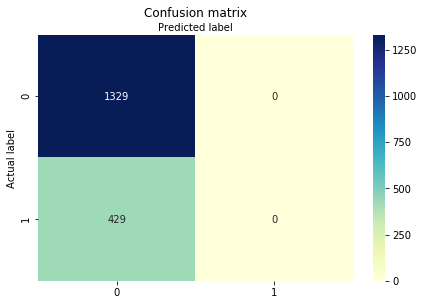

In [32]:
# Draw the confusion matrix 
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

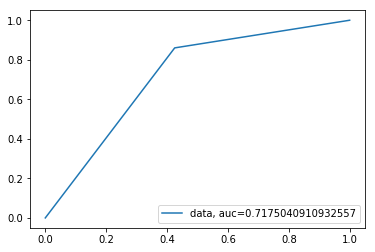

In [33]:
y_pred_proba = clf_best.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# 8. Conclusion

We see that the best model gives near 80% of accuracy with near 71% of ROC AUC. Meaning that it's better to use Linear Regression because it has better metrics